In [125]:
#load package to R
install.packages('tm')
install.packages('syuzhet')
library(tm) #text analysis - text mining
library(syuzhet)

Warning message:
"package 'tm' is in use and will not be installed"Warning message:
"package 'syuzhet' is in use and will not be installed"

In [126]:
install.packages("wordcloud") 
library(wordcloud) #create word cloud

Warning message:
"package 'wordcloud' is in use and will not be installed"

In [127]:
#import data into R
reviews <- read.csv('reviews.csv')

In [128]:
#check the structure of file
str(reviews)

'data.frame':	50 obs. of  8 variables:
 $ ï..id      : Factor w/ 50 levels "R12T2NBVCDIBJQ",..: 15 4 29 24 17 7 46 8 39 21 ...
 $ profileName: Factor w/ 49 levels "A. Galaviz","Aily",..: 20 34 6 28 45 24 39 8 38 36 ...
 $ text       : Factor w/ 50 levels "\n  Absolutely beautiful, I?Â\200?m so happy with my books! I was skeptical since many reviews mentioned missin"| __truncated__,..: 7 3 30 8 4 34 45 13 42 14 ...
 $ date       : Factor w/ 49 levels "Reviewed in the United States on April 2, 2019",..: 20 1 22 29 33 41 11 26 23 45 ...
 $ title      : Factor w/ 50 levels "A modern classic",..: 5 36 12 23 14 29 33 31 35 32 ...
 $ rating     : int  1 2 1 3 1 1 5 1 2 5 ...
 $ images     : Factor w/ 17 levels "","https://images-na.ssl-images-amazon.com/images/I/711xqmYCXpL.jpg\nhttps://images-na.ssl-images-amazon.com/image"| __truncated__,..: 1 4 1 1 1 1 7 1 2 1 ...
 $ helpful    : int  334 200 246 319 152 126 103 46 31 22 ...


In [129]:
#create a corpus
#this function uses the base package function inconv to translate value labels into a specified encoding
corpus <- iconv(reviews$text, 'UTF-8', 'ASCII') # handle emojis that tolower is not able to understand
corpus <- Corpus(VectorSource(corpus))

In [130]:
#to see the corpus
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] \n  Do not buy this! I recently read that Amazon sells pirated books (because they don't check they take the money no matter what they sell) which means, not only are the prints not authorized which is a legal issue, but for the consumer experience, it's detrimental as well. This box set is printed on such coarse paper (paper feels like industrial pulp), the ink becomes blurred and hard to read. Worse yet, I gave them to my daughter (who is too young to know about print quality and thus never complained), and she had to squint through volumes of this crappy print that totally ruined her eyesight, before I realized what was going on. Amazon you need to do better than this!\n
[2] \n  Beautiful covers and tough packaging. Bought these for my neices and nephews. I can read them but they are having trouble because the print on the pages. Several are blurry like this and book 1 (currently 

In [131]:
#clean the corpus
corpus <- tm_map(corpus, tolower) #lowercase
corpus <- tm_map(corpus,removePunctuation) #remove punctuation ex: .!@#$%^&*()_+ 
corpus <- tm_map(corpus, removeNumbers) #remove number
corpus <- tm_map(corpus, removeWords, stopwords("english")) #remove not important words, ex: the, are, a, at...
#remove some common words not to used in text analysis in real case
corpus <- tm_map(corpus, removeWords, c("book","books", "series", "set", "harry", "potter"))
corpus <- tm_map(corpus,stripWhitespace) #remove start and end of any text       
inspect(corpus[1:5])
reviews_final <- corpus

Warning message in tm_map.SimpleCorpus(corpus, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, c("book", "books", "series", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1]  buy recently read amazon sells pirated dont check take money matter sell means prints authorized legal issue consumer experience detrimental well box printed coarse paper paper feels like industrial pulp ink becomes blurred hard read worse yet gave daughter young know print quality thus never complained squint volumes crappy print totally ruined eyesight realized going amazon need better 
[2]  beautiful covers tough packaging bought neices nephews can read trouble print pages several blurry like currently neices possession several pages light spots middle can barely make words keep bringing us help havent yet imagine will similar                                                                                                                                                       
[3]  pages missing page                                                                                   

In [132]:
#create Term document
tdm <- TermDocumentMatrix(reviews_final)
tdm <- as.matrix(tdm)
tdm[1:10, 1:5]

,1,2,3,4,5
amazon,2,0,0,0,0
authorized,1,0,0,0,0
becomes,1,0,0,0,0
better,1,0,0,0,0
blurred,1,0,0,0,0
box,1,0,0,0,0
buy,1,0,0,0,0
check,1,0,0,0,0
coarse,1,0,0,0,0
complained,1,0,0,0,0


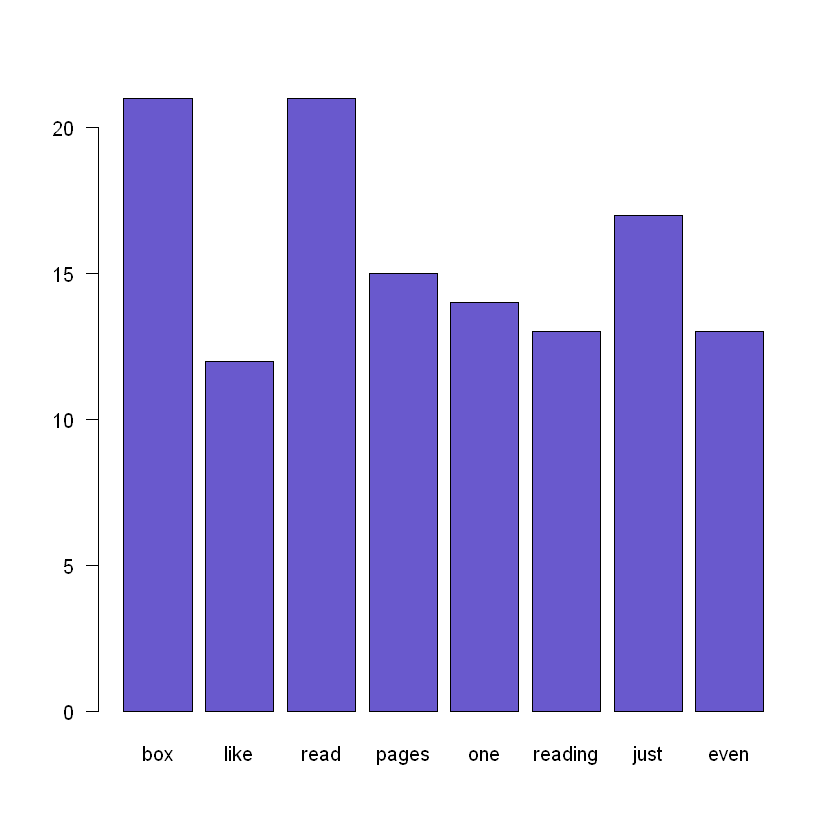

In [133]:
#bar plot of words
w <- rowSums(tdm)
w <- subset(w, w >= 12)
barplot(w, las = 1, col = 'slateblue3')

Warning message in brewer.pal(25, "Dark2"):
"n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
"

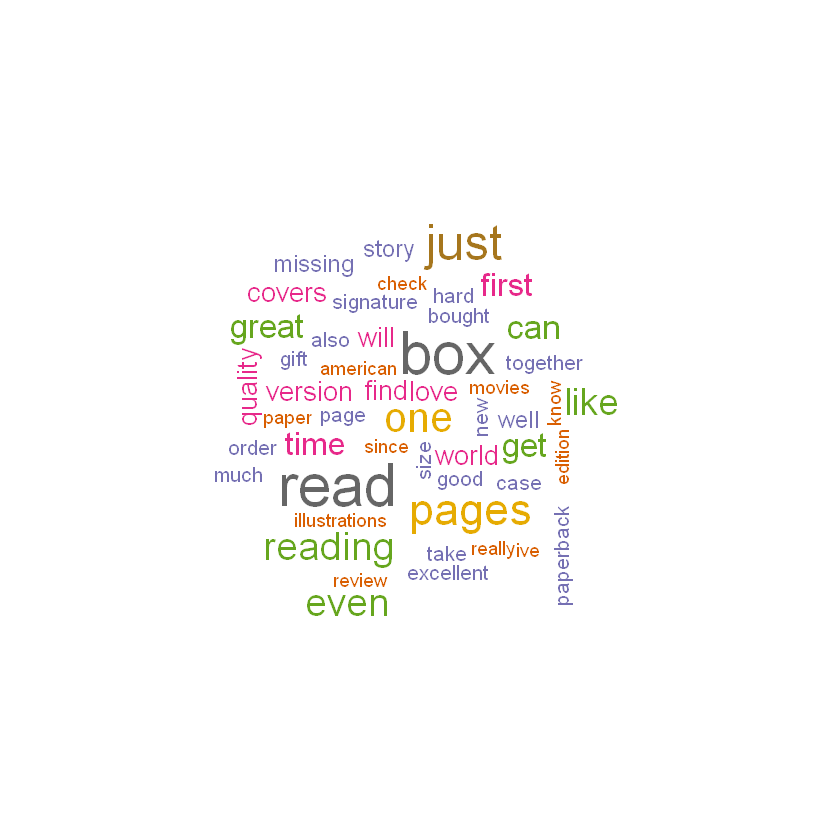

In [134]:
#create word cloud
w <- sort(rowSums(tdm), decreasing = T)
set.seed(1000)
wordcloud(words = names(w),
         freq = w,
         max.words = 50,
         random.order = T,
         min.freq = 5,
         colors = brewer.pal(25, "Dark2"),
         scale = c(3,0.3))

In [135]:
#obtain sentiment scores
sentiment_data <- iconv(reviews$text)
s <- get_nrc_sentiment(sentiment_data)
s[1:10,]

#calculate review wise score
s$score <- s$positive - s$negative
s[1:10,]

#write score to a csv file
write.csv(x = s, file = "C:/Users/Quynhfox/R Code/final_rev_Score.csv")

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
2,2,1,2,3,2,2,2,4,5
2,0,1,1,1,1,0,0,3,1
0,0,0,1,0,1,0,0,1,0
0,0,0,1,0,0,0,0,0,0
0,0,1,1,0,2,0,0,2,0
1,0,1,1,0,2,0,0,2,1
2,3,3,1,5,2,2,4,3,6
0,2,0,2,2,3,0,5,3,5
0,3,0,0,0,1,0,2,1,2
1,1,0,0,5,2,1,3,2,7


anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,score
2,2,1,2,3,2,2,2,4,5,1
2,0,1,1,1,1,0,0,3,1,-2
0,0,0,1,0,1,0,0,1,0,-1
0,0,0,1,0,0,0,0,0,0,0
0,0,1,1,0,2,0,0,2,0,-2
1,0,1,1,0,2,0,0,2,1,-1
2,3,3,1,5,2,2,4,3,6,3
0,2,0,2,2,3,0,5,3,5,2
0,3,0,0,0,1,0,2,1,2,1
1,1,0,0,5,2,1,3,2,7,5


Warning message in file(file, ifelse(append, "a", "w")):
"cannot open file 'C:/Users/Quynhfox/R Code/final_rev_Score.csv': Permission denied"

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


In [136]:
# check the product sentiment

# check overall sentiment of the product
review_score <- colSums(s[,])
print(review_score)

       anger anticipation      disgust         fear          joy      sadness 
          63          125           33           56          120           91 
    surprise        trust     negative     positive        score 
          55          142          152          273          121 


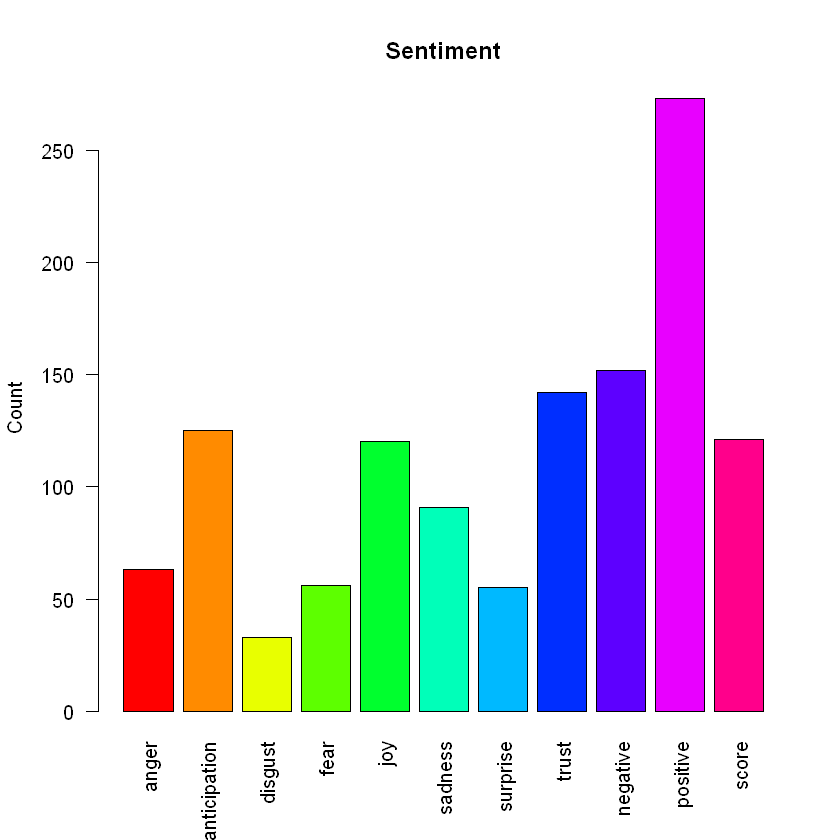

In [137]:
# plot product sentiment
# Bar plot
barplot(colSums(s),
       las =2,
       col = rainbow(11),
       ylab = 'Count',
       main = 'Sentiment')